In [1]:
# Import packages

## Most coding styles require package imports at the top of the notebook.
## This style prevents running much of a notebook to find a package needs to be installed.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Load dataset

In [2]:
# Load the hawks dataset
hawks = pd.read_csv('hawks.csv')

This dataset includes data about hawks at a nature preserve in Iowa.
 * Species - CH:Cooper's Hawk, SS:Sharp-shinned Hawk, RT:Redtail Hawk
 * Age - A:Adult, I:Immature
 * Wing - length of the primary wing feather in mm
 * Weight - Body weight in g
 * Culmen - Length along the top of the bill from tip to face in mm
 * Hallux - Length in mm of the killing talon
 * Tail - Aggregate measurement related to the length of the tail in mm

In [3]:
# Calculate summary statistics using .describe()
hawks.describe(include='all')

,Species,Age,Wing,Weight,Culmen,Hallux,Tail
count,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,3,2,NaN,NaN,NaN,NaN,NaN
top,RT,I,NaN,NaN,NaN,NaN,NaN
freq,567,672,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,315.947475,771.615039,21.808923,26.413244,198.893378
std,NaN,NaN,95.316699,462.936901,7.293190,17.825541,36.826634
min,NaN,NaN,37.200000,56.000000,8.600000,9.500000,119.000000
25%,NaN,NaN,202.000000,185.000000,12.800000,15.100000,160.000000
50%,NaN,NaN,370.000000,970.000000,25.500000,29.400000,214.000000
75%,NaN,NaN,390.000000,1120.000000,27.350000,31.400000,225.000000


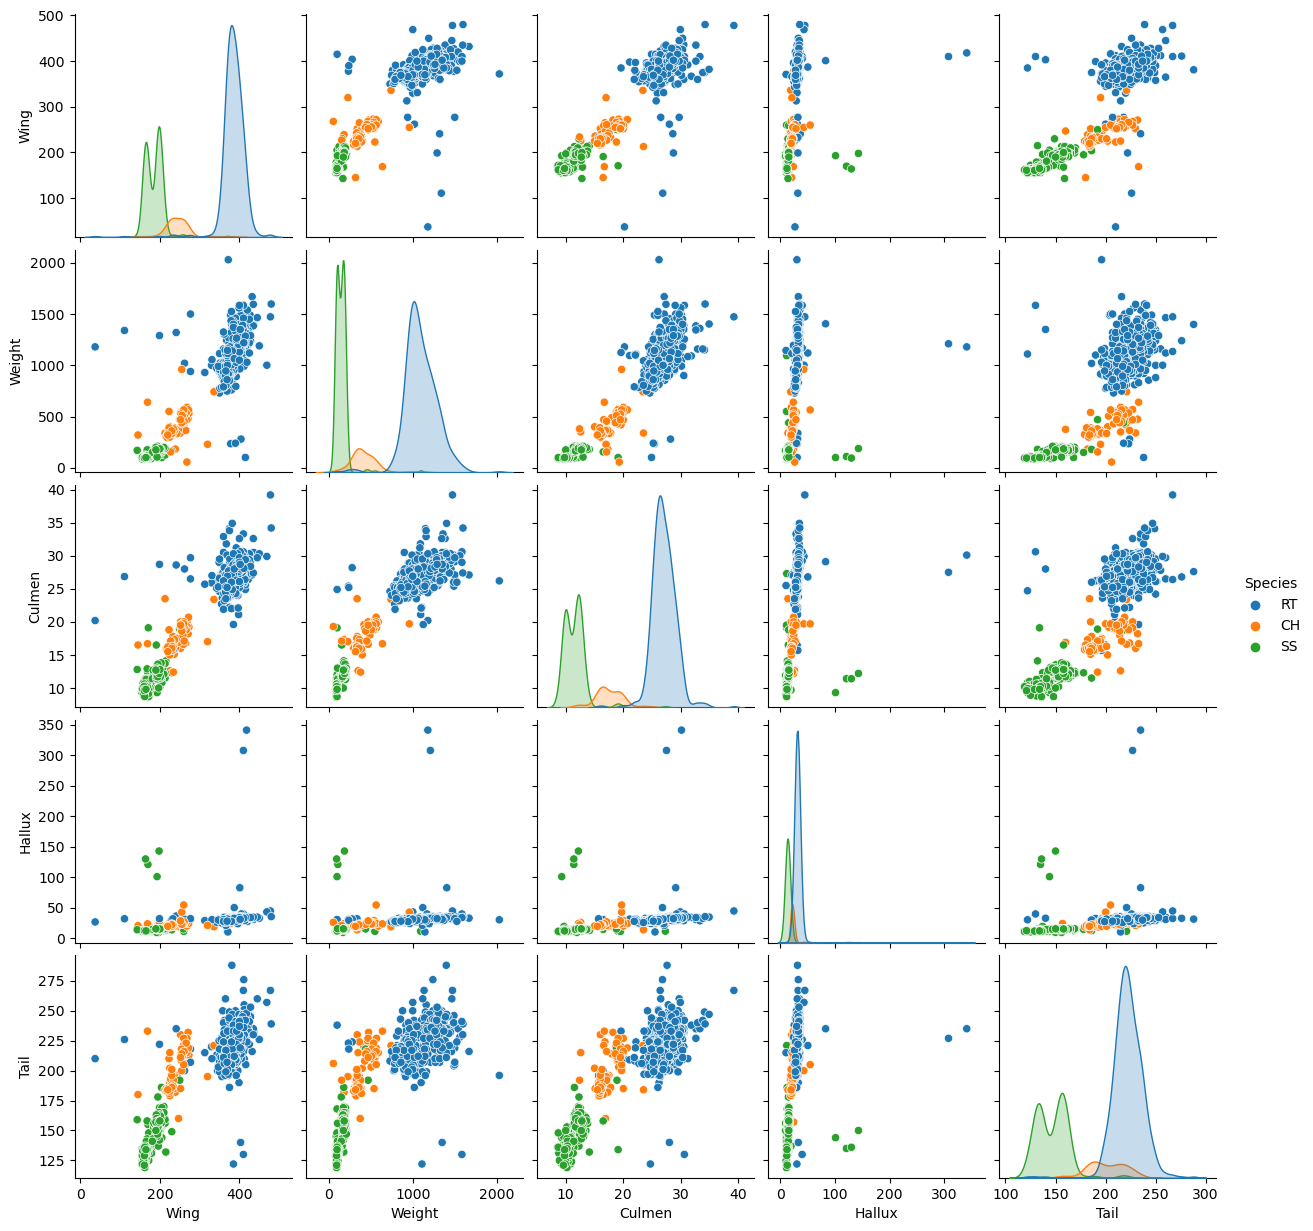

In [4]:
# Visualize the relationship between each pair of numerical variables
sns.pairplot(data=hawks, hue='Species')

In [5]:
# Calculate the mean for each feature according to each species.

## pandas makes calculating statistics of groups easy with the groupby function.
hawks.groupby('Species').mean()

,Wing,Weight,Culmen,Hallux,Tail
Species,,,,,
CH,244.144928,419.623188,17.563768,22.684058,200.956522
RT,383.629982,1094.841270,26.974956,32.014198,222.125220
SS,184.882353,148.156863,11.470784,14.968431,146.678431


In [6]:
# Calculate the maximum for each feature according to each species.
hawks.groupby('Species').max()

,Age,Wing,Weight,Culmen,Hallux,Tail
Species,,,,,,
CH,I,377.0,1119,25.4,54.5,233
RT,I,480.0,2030,39.2,341.4,288
SS,I,370.0,1094,27.3,143.0,221


Looking at the Hallux column in the pairplot and the summary groupby statistics, the maximum Hallux length is 341mm or over a foot long! Hallux length may have some entry errors that put the decimal point in the wrong place.

<AxesSubplot: xlabel='Hallux', ylabel='Count'>

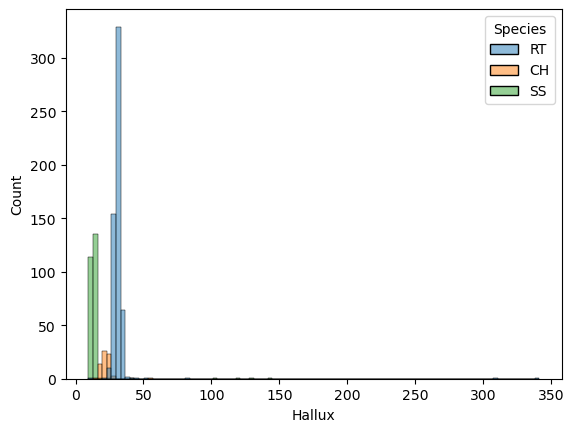

In [7]:
# Plot the distribution of hallux length to determine a good cutoff
sns.histplot(data=hawks, x='Hallux', hue='Species')

In [8]:
# Remap the extreme outliers
## Adjust the cutoff to remap obviously wrong Hallux lengths to the correct units.
## Change this value and rerun this cell and the cell below until happy with the results.
cutoff = 200
hawks.loc[hawks['Hallux'] > cutoff, 'Hallux'] = (
    hawks.loc[hawks['Hallux'] > cutoff, 'Hallux'] / 10
)

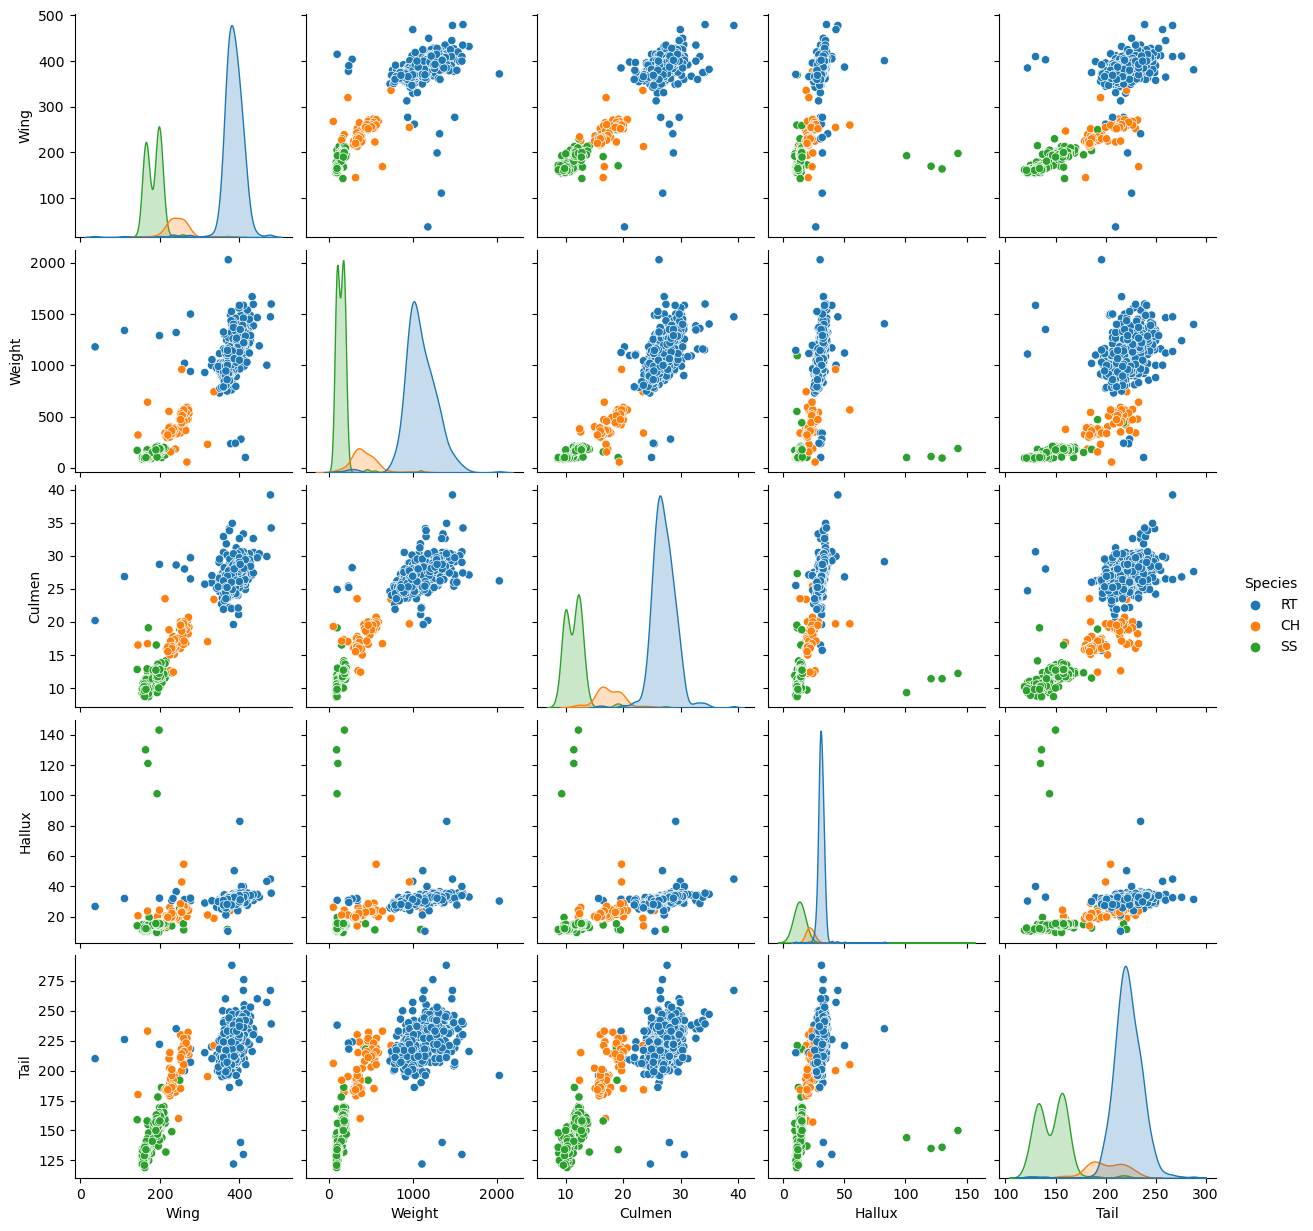

In [9]:
# Plot to see if all obvious outliers have remapped.
sns.pairplot(data=hawks, hue='Species')

## Building a model

In [10]:
# Use everything but species to predict species
X = hawks.drop('Species', axis=1)
y = hawks['Species']

# Encode Age as a dummy variable.
X = pd.get_dummies(X, drop_first=True)

# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20220705
)

In [11]:
# Use a random forest model from scikit-learn
species_rf = RandomForestClassifier(
    max_depth=1,  # Change this value and run this cell and all those below.
    n_estimators=10,
    random_state=20220706,
)
species_rf.fit(X_train, y_train)  # Fit the model on the training set

RandomForestClassifier(max_depth=1, n_estimators=10, random_state=20220706)

In [12]:
# Make predictions for the test set.
y_pred = species_rf.predict(X_test)

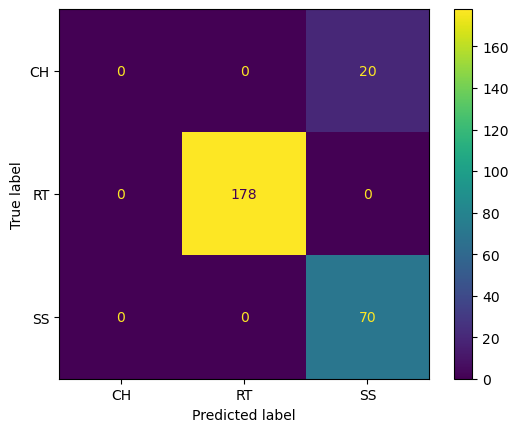

In [13]:
# Plot the confusion matrix to check how the model did
# using a function from scikit-learn's metrics subpackage.
# The number of correct classifications appear on the diagonal.

## Does changing max_depth  lead to more correct classifications?
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)